In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston['MEDV'] = boston_dataset.target

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values

In [8]:
#Predicting house values from single feature
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [9]:
#To keep the first dimension and add another dimension 1 to X
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

In [10]:
import matplotlib.pyplot as plt 

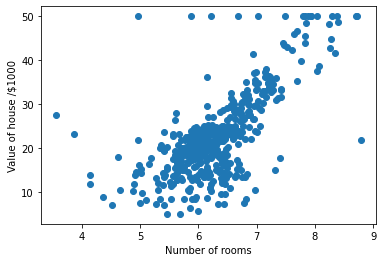

In [11]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /$1000')
plt.xlabel('Number of rooms')
plt.show();

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_rooms, y)

LinearRegression()

In [13]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

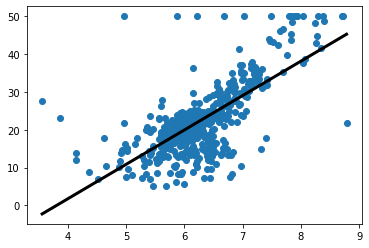

In [14]:
plt.scatter(X_rooms, y)
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [18]:
reg_all.score(X_test, y_test)

0.711226005748496

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cv_results = cross_val_score(reg, X, y, cv=5)

In [21]:
#Length of the array is number of the folds utilised
#Score reported is R^2(Default score for LR)

In [22]:
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [23]:
np.mean(cv_results)

0.3532759243958772

# LASSO IN ACTION

In [24]:
from sklearn.linear_model import Lasso

In [25]:
names = boston.drop('MEDV', axis = 1).columns

In [26]:
lasso = Lasso(alpha = 0.1)

In [27]:
lasso_coef = lasso.fit(X, y).coef_

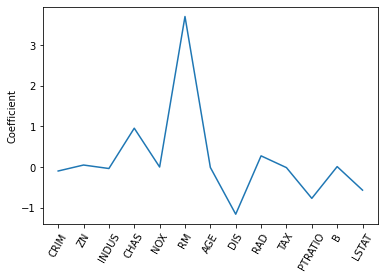

In [28]:
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficient')
plt.show()